In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [4]:
mhData = pd.read_csv("files/maharashtra-districts.csv")

In [5]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),Urban Population (%),Formation Date,Geographical Coordinates (Latitude and Longitude),Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,60.5,1 May 1960,"18.52° N, 73.85° E","Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,..."
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,21.9,1 May 1960,"17.68° N, 74.01° E","Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg..."
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,25.5,1 May 1960,"16.85° N, 74.58° E","Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio..."
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,32.4,1 May 1960,"17.68° N, 75.90° E","Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah..."
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,31.7,1 May 1960,"16.70° N, 74.24° E","Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp..."
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,100.0,1 May 1960,"18.96° N, 72.82° E",Mithi,NaN,"Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ..."
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,100.0,1 October 1990,"19.07° N, 72.87° E","Mithi, Oshiwara, Dahisar",NaN,"IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ..."
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,77.0,1 May 1960,"19.21° N, 72.97° E","Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir..."
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,50.1,1 August 2014,"19.69° N, 72.77° E","Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ..."
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,24.9,1 May 1960,"18.65° N, 73.07° E","Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,..."


In [6]:
mhData['Major Crop(s)'].fillna("Sugarcane, Rice, Soybean, Jaggery",inplace= True)

C:\Users\pc\AppData\Local\Temp\ipykernel_3868\2642191465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mhData['Major Crop(s)'].fillna("Sugarcane, Rice, Soybean, Jaggery",inplace= True)


In [7]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),Urban Population (%),Formation Date,Geographical Coordinates (Latitude and Longitude),Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,60.5,1 May 1960,"18.52° N, 73.85° E","Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,..."
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,21.9,1 May 1960,"17.68° N, 74.01° E","Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg..."
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,25.5,1 May 1960,"16.85° N, 74.58° E","Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio..."
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,32.4,1 May 1960,"17.68° N, 75.90° E","Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah..."
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,31.7,1 May 1960,"16.70° N, 74.24° E","Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp..."
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,100.0,1 May 1960,"18.96° N, 72.82° E",Mithi,"Sugarcane, Rice, Soybean, Jaggery","Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ..."
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,100.0,1 October 1990,"19.07° N, 72.87° E","Mithi, Oshiwara, Dahisar","Sugarcane, Rice, Soybean, Jaggery","IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ..."
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,77.0,1 May 1960,"19.21° N, 72.97° E","Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir..."
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,50.1,1 August 2014,"19.69° N, 72.77° E","Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ..."
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,24.9,1 May 1960,"18.65° N, 73.07° E","Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,..."


In [8]:
talkuscount = mhData.groupby("Administrative Division")['Number of Talukas'].sum()
print(talkuscount)

Administrative Division
Amravati Division                      56
Chhatrapati Sambhaji Nagar Division    76
Konkan Division                        50
Nagpur Division                        64
Nashik Division                        54
Pune Division                          58
Name: Number of Talukas, dtype: int64


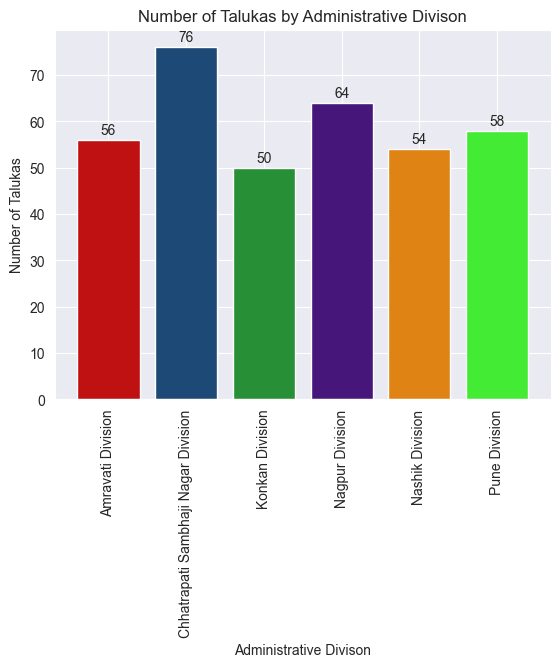

In [9]:
#Bar Graph
# Number of Talukas by Administraive Division
c = ['#bf1111', '#1c4975', '#278f36', '#47167a', '#de8314',"#43eb34"]
plt.bar(talkuscount.index,talkuscount.values,color = c)
plt.xticks(rotation= 90)
plt.xlabel("Administrative Divison")
plt.ylabel("Number of Talukas")
plt.title("Number of Talukas by Administrative Divison")
# Add labels on top of bars
for i, v in enumerate(talkuscount.values):
    plt.text(i, v + 0.60, str(v), ha='center', va='bottom')

plt.show()

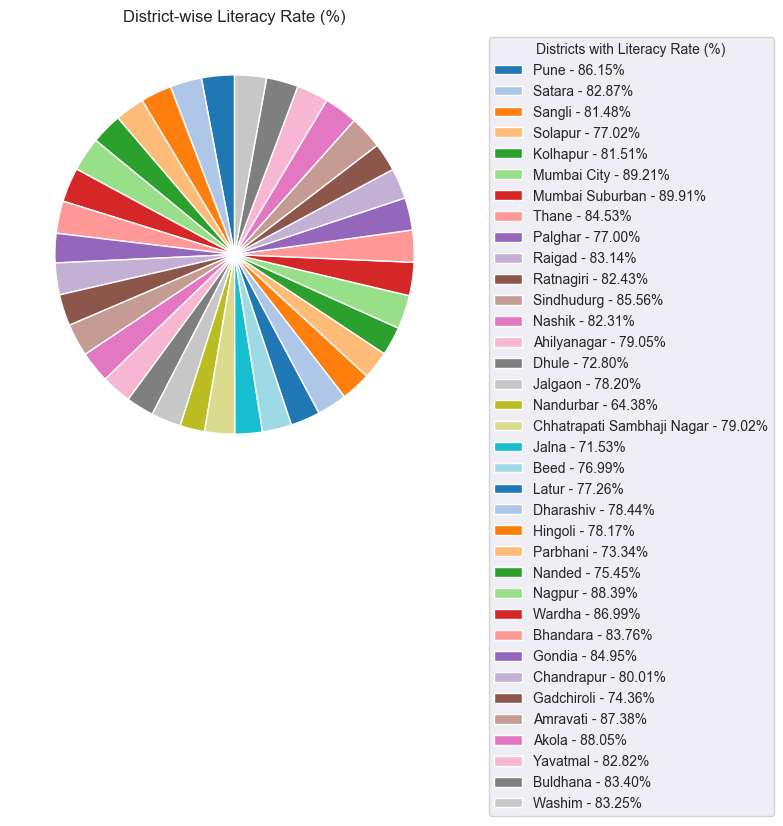

In [10]:
plt.figure(figsize=(8,8))

# Use a colormap to generate distinct colors for each district
colors = plt.cm.tab20.colors  # you can try Set3, Paired, Accent, etc.

wedges, texts = plt.pie(
    mhData['Literacy Rate (%)'],
    startangle=90,
    colors=colors[:len(mhData)]  # assign unique colors
)

percentages = mhData['Literacy Rate (%)']
labels = [f"{d} - {p:.2f}%" for d, p in zip(mhData['District Name'], percentages)]

plt.legend(
    wedges,
    labels,
    title="Districts with Literacy Rate (%)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.title("District-wise Literacy Rate (%)")
plt.tight_layout()
plt.show()

In [11]:
# Extract features from "Geographical Coordinates" (latitude, longitude).
def convert_coords(coord):
    lat, lon = coord.split(", ")
    if "N" in lat:
     lat = float(lat.replace("° N", " "))

    if "E" in lon:
        lon = float(lon.replace("° E", " "))

    return lat, lon

In [12]:
mhData[["Latitude", "Longitude"]] = mhData["Geographical Coordinates (Latitude and Longitude)"].apply(lambda x: pd.Series(convert_coords(x)))

In [13]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),Urban Population (%),Formation Date,Geographical Coordinates (Latitude and Longitude),Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions,Latitude,Longitude
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,60.5,1 May 1960,"18.52° N, 73.85° E","Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,...",18.52,73.85
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,21.9,1 May 1960,"17.68° N, 74.01° E","Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg...",17.68,74.01
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,25.5,1 May 1960,"16.85° N, 74.58° E","Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio...",16.85,74.58
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,32.4,1 May 1960,"17.68° N, 75.90° E","Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah...",17.68,75.90
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,31.7,1 May 1960,"16.70° N, 74.24° E","Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp...",16.70,74.24
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,100.0,1 May 1960,"18.96° N, 72.82° E",Mithi,"Sugarcane, Rice, Soybean, Jaggery","Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ...",18.96,72.82
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,100.0,1 October 1990,"19.07° N, 72.87° E","Mithi, Oshiwara, Dahisar","Sugarcane, Rice, Soybean, Jaggery","IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ...",19.07,72.87
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,77.0,1 May 1960,"19.21° N, 72.97° E","Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir...",19.21,72.97
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,50.1,1 August 2014,"19.69° N, 72.77° E","Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ...",19.69,72.77
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,24.9,1 May 1960,"18.65° N, 73.07° E","Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,...",18.65,73.07


In [15]:
mhData["Rural_Population %"] = 100 - mhData["Urban Population (%)"]

In [16]:
#Clustering (KMeans) – Group districts by Population, Density, Literacy, Urban , Rural
features = mhData[[
    "Population (Census 2011)",
    "Population Density (per sq. km)",
    "Literacy Rate (%)",
    "Urban Population (%)",
    "Rural_Population %"
]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
mhData["Cluster"] = kmeans.fit_predict(scaled_features)

print(mhData[["District Name","Population (Census 2011)", "Population Density (per sq. km)", "Literacy Rate (%)","Urban Population (%)",
              "Rural_Population %", "Cluster"]])

                 District Name  Population (Census 2011)  \
0                         Pune                   9429408   
1                       Satara                   3003741   
2                       Sangli                   2822143   
3                      Solapur                   4317756   
4                     Kolhapur                   3876001   
5                  Mumbai City                   2969472   
6              Mumbai Suburban                   9356962   
7                        Thane                   8131377   
8                      Palghar                   2990116   
9                       Raigad                   2634200   
10                   Ratnagiri                   1615069   
11                  Sindhudurg                    849651   
12                      Nashik                   6107187   
13                 Ahilyanagar                   4543159   
14                       Dhule                   2050862   
15                     Jalgaon          

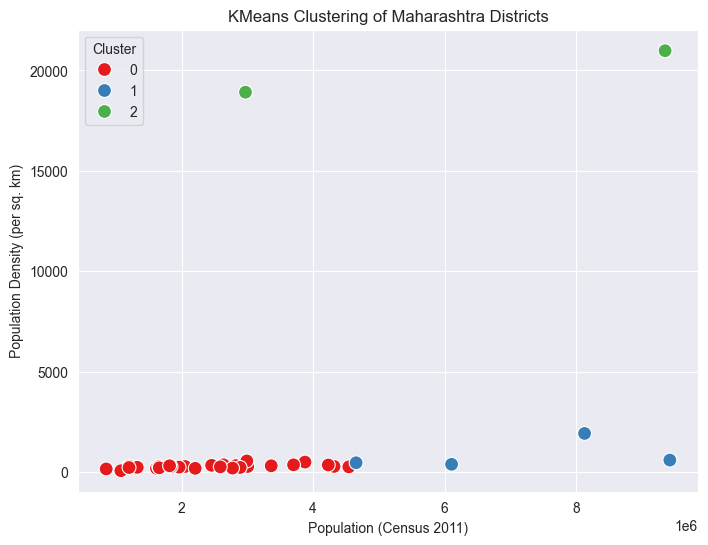

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Population (Census 2011)",
    y="Population Density (per sq. km)",
    hue="Cluster",
    data=mhData,
    palette="Set1",
    s=100
)
plt.title("KMeans Clustering of Maharashtra Districts")
plt.show()

In [18]:
# Features (X) आणि Target (Y)
X = mhData[["Population (Census 2011)", "Area (in sq. km)", "Urban Population (%)", "Rural_Population %"]]
Y = mhData[["Population Density (per sq. km)"]]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, Y_train)

# Prediction Example (User Input)
input_population = float(input("Enter the Population (number): "))
input_area = float(input("Enter the Area (sq km): "))
input_urbanpopulation = float(input("Enter the Urban Population (%): "))
input_ruralpopulation = float(input("Enter the Rural Population (%): "))

predicted_density = model.predict(
    np.array([[input_population, input_area, input_urbanpopulation, input_ruralpopulation]])
)

print("Predicted Population Density:", predicted_density[0][0])

Predicted Population Density: 707.2668226843653


G:\project1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),...,Formation Date,Geographical Coordinates (Latitude and Longitude),Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions,Latitude,Longitude,Rural_Population %,Cluster
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,...,1 May 1960,"18.52° N, 73.85° E","Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,...",18.52,73.85,39.5,1
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,...,1 May 1960,"17.68° N, 74.01° E","Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg...",17.68,74.01,78.1,0
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,...,1 May 1960,"16.85° N, 74.58° E","Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio...",16.85,74.58,74.5,0
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,...,1 May 1960,"17.68° N, 75.90° E","Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah...",17.68,75.90,67.6,0
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,...,1 May 1960,"16.70° N, 74.24° E","Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp...",16.70,74.24,68.3,0
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,...,1 May 1960,"18.96° N, 72.82° E",Mithi,"Sugarcane, Rice, Soybean, Jaggery","Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ...",18.96,72.82,0.0,2
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,...,1 October 1990,"19.07° N, 72.87° E","Mithi, Oshiwara, Dahisar","Sugarcane, Rice, Soybean, Jaggery","IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ...",19.07,72.87,0.0,2
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,...,1 May 1960,"19.21° N, 72.97° E","Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir...",19.21,72.97,23.0,1
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,...,1 August 2014,"19.69° N, 72.77° E","Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ...",19.69,72.77,49.9,0
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,...,1 May 1960,"18.65° N, 73.07° E","Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,...",18.65,73.07,75.1,0


In [22]:
mhData["Rural_Population"] = (
    (mhData["Population (Census 2011)"] * mhData["Rural_Population %"] / 100)
    .round()
    .astype(int)
)

In [23]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),...,Geographical Coordinates (Latitude and Longitude),Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions,Latitude,Longitude,Rural_Population %,Cluster,Rural_Population
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,...,"18.52° N, 73.85° E","Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,...",18.52,73.85,39.5,1,3724616
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,...,"17.68° N, 74.01° E","Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg...",17.68,74.01,78.1,0,2345922
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,...,"16.85° N, 74.58° E","Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio...",16.85,74.58,74.5,0,2102497
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,...,"17.68° N, 75.90° E","Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah...",17.68,75.90,67.6,0,2918803
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,...,"16.70° N, 74.24° E","Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp...",16.70,74.24,68.3,0,2647309
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,...,"18.96° N, 72.82° E",Mithi,"Sugarcane, Rice, Soybean, Jaggery","Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ...",18.96,72.82,0.0,2,0
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,...,"19.07° N, 72.87° E","Mithi, Oshiwara, Dahisar","Sugarcane, Rice, Soybean, Jaggery","IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ...",19.07,72.87,0.0,2,0
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,...,"19.21° N, 72.97° E","Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir...",19.21,72.97,23.0,1,1870217
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,...,"19.69° N, 72.77° E","Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ...",19.69,72.77,49.9,0,1492068
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,...,"18.65° N, 73.07° E","Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,...",18.65,73.07,75.1,0,1978284


In [24]:
mhData["Urban_Population"] = (
    (mhData["Population (Census 2011)"] * mhData["Urban Population (%)"] / 100)
    .round()
    .astype(int)
)

In [25]:
mhData

,District Name,District Code,Administrative Division,Headquarters,Number of Talukas,Area (in sq. km),Population (Census 2011),Population Density (per sq. km),Sex Ratio,Literacy Rate (%),...,Major River(s),Major Crop(s),Key Industries/Economy,Tourist Attractions,Latitude,Longitude,Rural_Population %,Cluster,Rural_Population,Urban_Population
0,Pune,PU,Pune Division,Pune,14,15643,9429408,603,915,86.15,...,"Bhima, Mula, Mutha, Indrayani","Sugarcane, Jowar, Bajra, Grapes, Onions","IT & ITeS, Automotive, Manufacturing, Educatio...","Shaniwar Wada, Aga Khan Palace, Sinhagad Fort,...",18.52,73.85,39.5,1,3724616,5704792
1,Satara,ST,Pune Division,Satara,11,10480,3003741,287,988,82.87,...,"Krishna, Koyna, Venna","Sugarcane, Jowar, Soybean, Turmeric","Agriculture, Wind Power, Sugar Factories, Tourism","Kaas Plateau, Mahabaleshwar, Panchgani, Thoseg...",17.68,74.01,78.1,0,2345922,657819
2,Sangli,SN,Pune Division,Sangli,10,8572,2822143,329,966,81.48,...,"Krishna, Warana","Sugarcane, Grapes, Turmeric, Jowar","Sugar Production, Turmeric Processing, Textile...","Sagareshwar Wildlife Sanctuary, Chandoli Natio...",16.85,74.58,74.5,0,2102497,719646
3,Solapur,SO,Pune Division,Solapur,11,14895,4317756,290,938,77.02,...,"Bhima, Sina, Man","Jowar, Sugarcane, Pomegranate, Pulses","Textiles (Chaddars), Sugar Factories, Beedi In...","Siddheshwar Temple, Akkalkot Swami Samarth Mah...",17.68,75.90,67.6,0,2918803,1398953
4,Kolhapur,KO,Pune Division,Kolhapur,12,7685,3876001,504,957,81.51,...,"Panchganga, Krishna, Dudhganga","Sugarcane, Rice, Soybean, Jaggery","Sugar Mills, Foundries, Textiles, Kolhapuri Ch...","Mahalakshmi Temple, Panhala Fort, Jyotiba Temp...",16.70,74.24,68.3,0,2647309,1228692
5,Mumbai City,MC,Konkan Division,Mumbai,0,157,2969472,18914,832,89.21,...,Mithi,"Sugarcane, Rice, Soybean, Jaggery","Finance, Commerce, Entertainment (Bollywood), ...","Gateway of India, Marine Drive, Siddhivinayak ...",18.96,72.82,0.0,2,0,2969472
6,Mumbai Suburban,MS,Konkan Division,Bandra (East),3,446,9356962,20980,860,89.91,...,"Mithi, Oshiwara, Dahisar","Sugarcane, Rice, Soybean, Jaggery","IT, Services, Residential Hubs, Small Scale In...","Juhu Beach, Film City, Sanjay Gandhi National ...",19.07,72.87,0.0,2,0,9356962
7,Thane,TH,Konkan Division,Thane,7,4214,8131377,1930,886,84.53,...,"Ulhas, Vaitarna","Rice, Vegetables, Fruits","Manufacturing, Chemicals, Pharmaceuticals, Eng...","Upvan Lake, Kelwa Beach, Titwala Ganesh Mandir...",19.21,72.97,23.0,1,1870217,6261160
8,Palghar,PL,Konkan Division,Palghar,8,5344,2990116,560,932,77.00,...,"Vaitarna, Surya, Pinjal","Rice, Chickoo, Coconut","Fishing, Agriculture, Industrial Estates (Bois...","Dahanu-Bordi Beach, Kelwa Dam, Jivdani Temple ...",19.69,72.77,49.9,0,1492068,1498048
9,Raigad,RG,Konkan Division,Alibag,15,7152,2634200,368,959,83.14,...,"Patalganga, Amba, Savitri","Rice, Mango, Cashew Nut, Coconut","Chemicals, Petrochemicals, Steel, Tourism, Por...","Raigad Fort, Murud-Janjira Fort, Alibag Beach,...",18.65,73.07,75.1,0,1978284,655916
